In [1]:
import pandas as pd
import json
import numpy as np
import sys
sys.path.append("..")
from scoring import bootstrap_roc_auc
import matplotlib.pyplot as plt

In [2]:
def get_data(path):
    data = np.loadtxt(path)
    return data

In [6]:
labels = get_data(path = "leave_one_out_labels.txt")

In [8]:
preds_with_traj = get_data(path = "leave_one_out_with_traj_with_barriers.txt")

In [9]:
preds_without_traj = get_data(path = "leave_one_out_without_traj_with_barriers.txt")

Without trajectories

In [10]:
estimated_mean, estimated_std = bootstrap_roc_auc(10000, labels, preds_without_traj)
print(estimated_mean, estimated_std)

0.7635227076431993 0.04702383429074898


With trajectories

In [11]:
estimated_mean, estimated_std = bootstrap_roc_auc(10000, labels, preds_with_traj)
print(estimated_mean, estimated_std)

0.736113234138578 0.049612087535160075


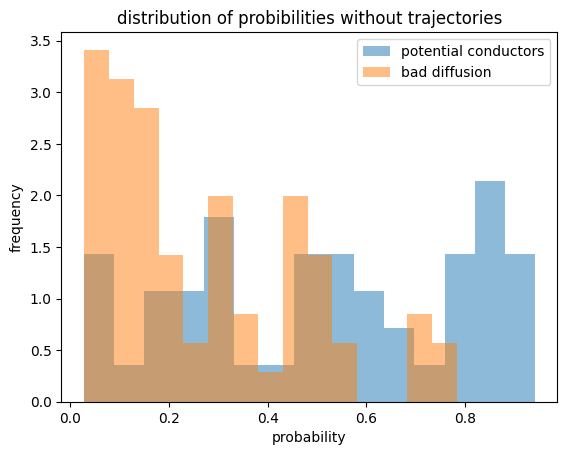

In [14]:

plt.hist(preds_without_traj[labels != 0], alpha=0.5, label='potential conductors', density = True, stacked = True, bins = 15)
plt.hist(preds_without_traj[labels == 0], alpha=0.5, label='bad diffusion', density = True, stacked = True, bins = 15)

plt.legend(loc='upper right')
plt.title('distribution of probibilities without trajectories')
plt.xlabel('probability')
plt.ylabel('frequency')
plt.show()

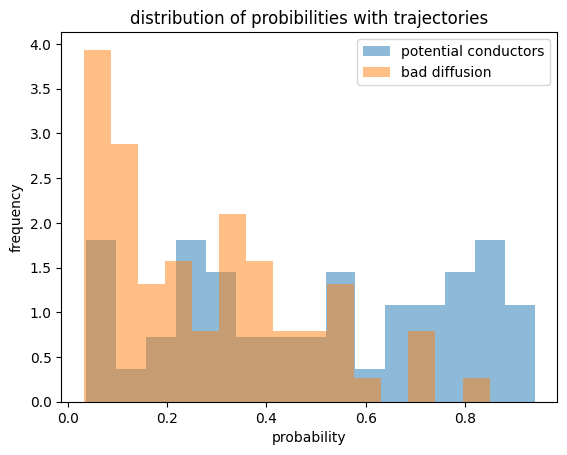

In [15]:

plt.hist(preds_with_traj[labels != 0], alpha=0.5, label='potential conductors', density = True, stacked = True, bins = 15)
plt.hist(preds_with_traj[labels == 0], alpha=0.5, label='bad diffusion', density = True, stacked = True, bins = 15)

plt.legend(loc='upper right')
plt.title('distribution of probibilities with trajectories')
plt.xlabel('probability')
plt.ylabel('frequency')
plt.show()